Tỷ lệ train/test: 7/3
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 11243.57, Test MAPE: 70.86%, Test MSLE: 1.67



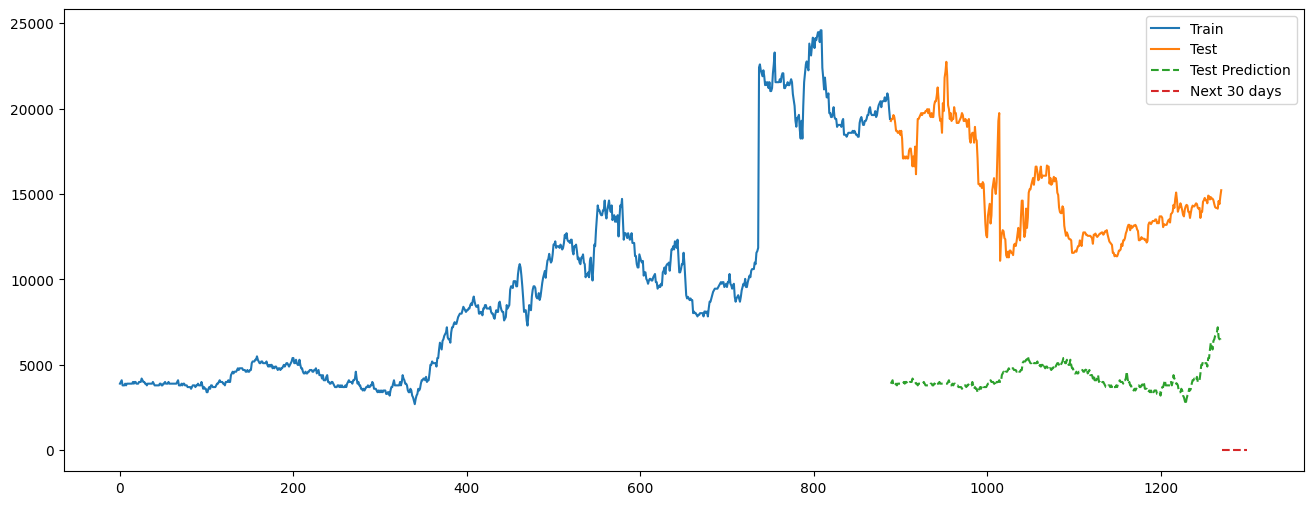

Tỷ lệ train/test: 8/2
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 9313.02, Test MAPE: 67.90%, Test MSLE: 1.35



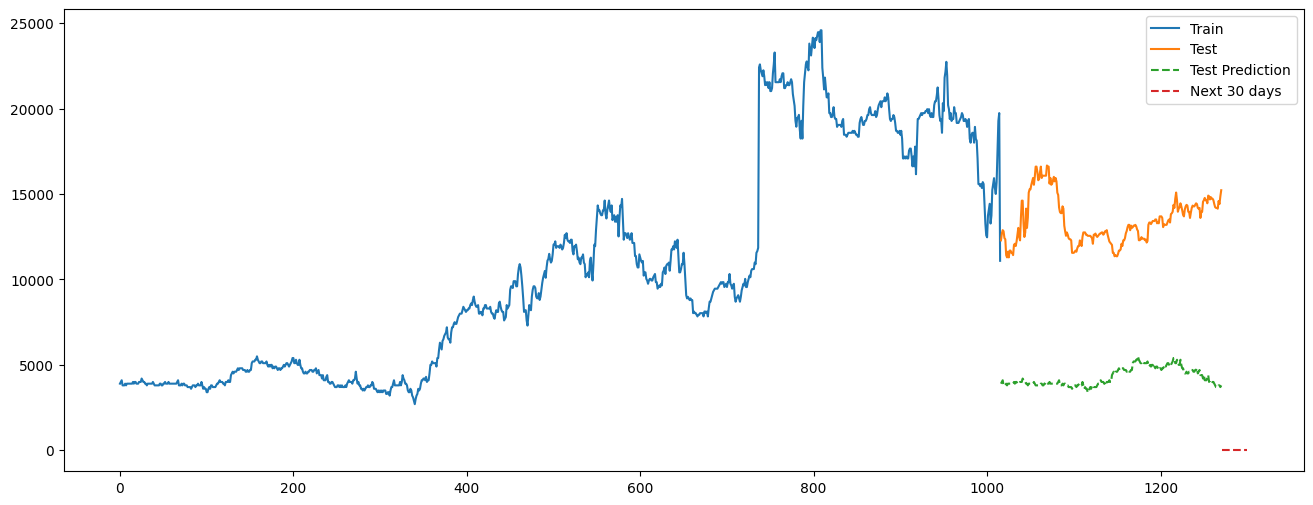

Tỷ lệ train/test: 9/1
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 9666.76, Test MAPE: 71.17%, Test MSLE: 1.56



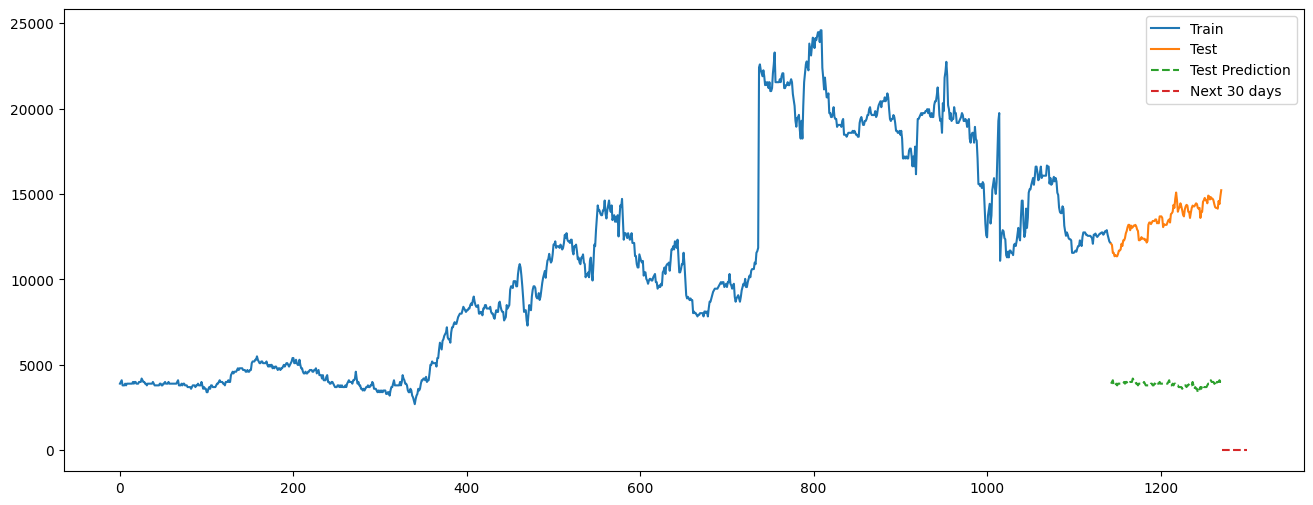

In [9]:
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('AMV.csv')
# Loại bỏ dấu phẩy khỏi chuỗi số và chuyển đổi thành số thực
prices = [float(price.replace(',', '')) for price in data['Price']]


# Hàm dự báo FFT
def fft_forecast(train, test, forecast_len):
    train_fft = fft(train)

    # Lọc bỏ các tần số cao
    train_fft[np.abs(train_fft) < 0.1] = 0

    # Tính toán dữ liệu dự báo bằng FFT ngược
    train_prediction = np.real(ifft(train_fft))

    # Dự báo cho dữ liệu test
    test_prediction = np.concatenate([train_prediction[-len(train):], np.zeros(len(test))])
    test_prediction = np.real(ifft(fft(test_prediction)))[:len(test)]

    # Dự báo cho các ngày tiếp theo
    future_prediction = np.concatenate([train_prediction, test_prediction, np.zeros(forecast_len)])
    future_prediction = np.real(ifft(fft(future_prediction)))[-forecast_len:]

    return train_prediction, test_prediction, future_prediction

# Hàm đánh giá mô hình
def evaluate_model(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = mean_absolute_percentage_error(true, pred) * 100
    msle = mean_squared_log_error(true, pred)
    return rmse, mape, msle

# Chia dữ liệu theo các tỷ lệ khác nhau
data_sizes = [(7, 3), (8, 2), (9, 1)]
for train_ratio, test_ratio in data_sizes:
    train_len = int(len(prices) * train_ratio / (train_ratio + test_ratio))
    test_len = len(prices) - train_len

    train_data = prices[:train_len]
    test_data = prices[train_len:]

    train_pred, test_pred, future_pred = fft_forecast(train_data, test_data, 30)

    # Đánh giá mô hình
    train_rmse, train_mape, train_msle = evaluate_model(train_data, train_pred)
    test_rmse, test_mape, test_msle = evaluate_model(test_data, test_pred)

    print(f"Tỷ lệ train/test: {train_ratio}/{test_ratio}")
    print(f"Train RMSE: {train_rmse:.2f}, Train MAPE: {train_mape:.2f}%, Train MSLE: {train_msle:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}, Test MAPE: {test_mape:.2f}%, Test MSLE: {test_msle:.2f}")
    print()

    # Vẽ đồ thị
    plt.figure(figsize=(16, 6))
    plt.plot(np.arange(len(train_data)), train_data, label='Train')
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_pred)), test_pred, '--', label='Test Prediction')
    plt.plot(np.arange(len(prices), len(prices) + 30), future_pred, '--', label='Next 30 days')
    plt.legend()
    plt.show()

Tỷ lệ train/test: 7/3
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 6287.60, Test MAPE: 36.38%, Test MSLE: 0.11



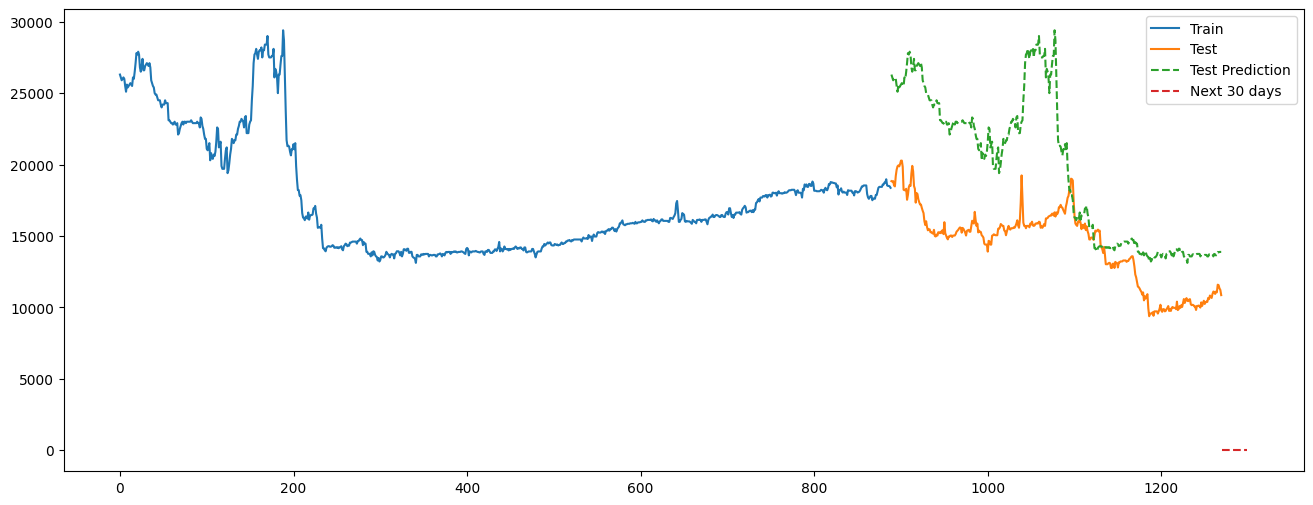

Tỷ lệ train/test: 8/2
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 9919.21, Test MAPE: 72.76%, Test MSLE: 0.32



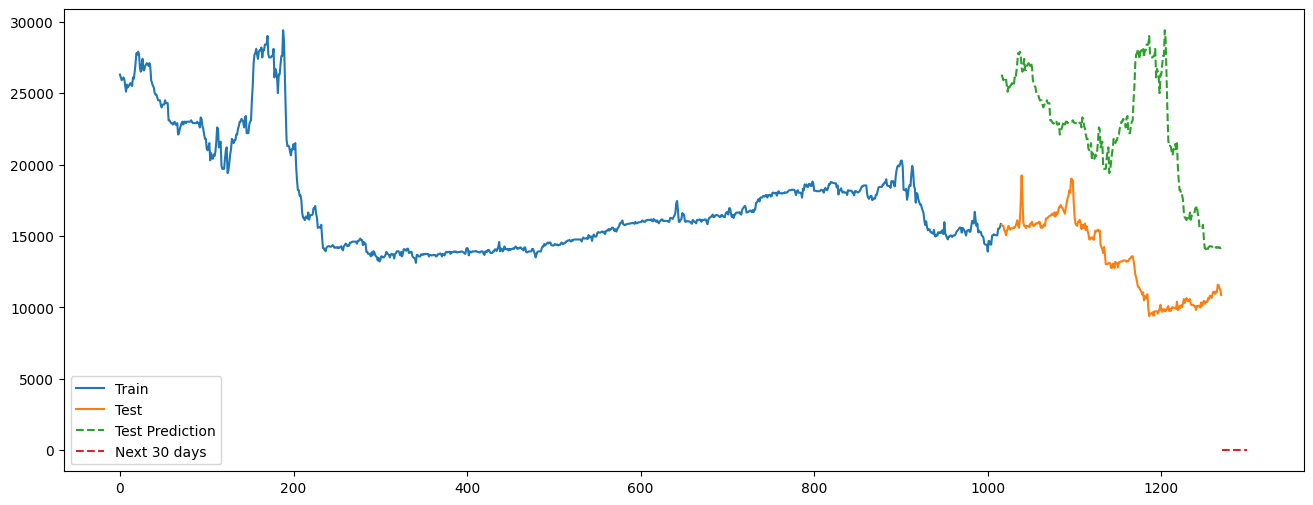

Tỷ lệ train/test: 9/1
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 12859.83, Test MAPE: 117.69%, Test MSLE: 0.61



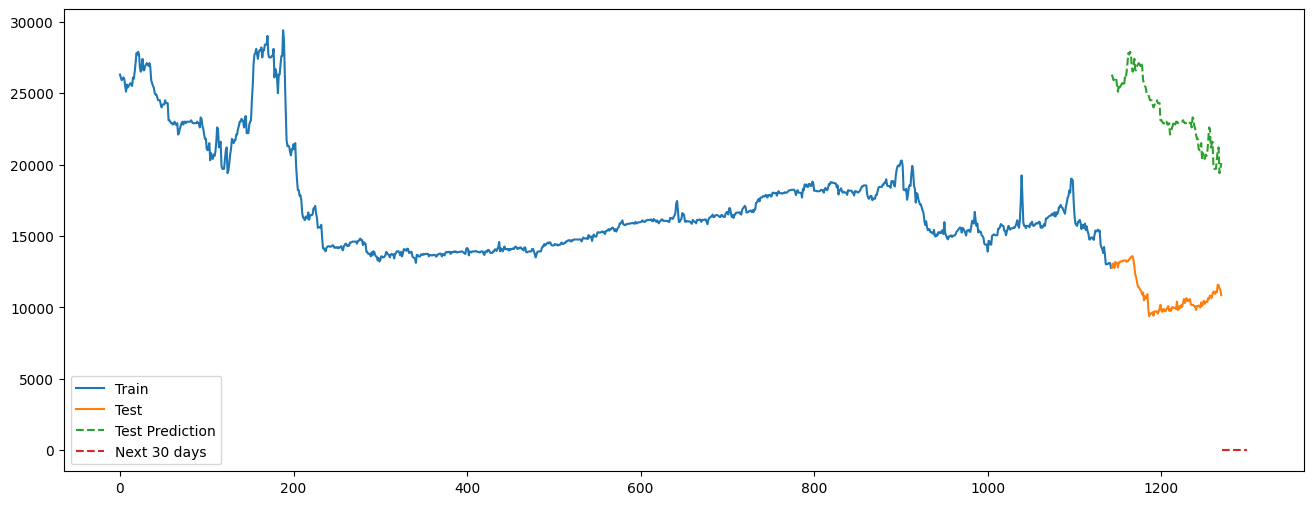

In [8]:
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('DHT.csv')
# Loại bỏ dấu phẩy khỏi chuỗi số và chuyển đổi thành số thực
prices = [float(price.replace(',', '')) for price in data['Price']]


# Hàm dự báo FFT
def fft_forecast(train, test, forecast_len):
    train_fft = fft(train)

    # Lọc bỏ các tần số cao
    train_fft[np.abs(train_fft) < 0.1] = 0

    # Tính toán dữ liệu dự báo bằng FFT ngược
    train_prediction = np.real(ifft(train_fft))

    # Dự báo cho dữ liệu test
    test_prediction = np.concatenate([train_prediction[-len(train):], np.zeros(len(test))])
    test_prediction = np.real(ifft(fft(test_prediction)))[:len(test)]

    # Dự báo cho các ngày tiếp theo
    future_prediction = np.concatenate([train_prediction, test_prediction, np.zeros(forecast_len)])
    future_prediction = np.real(ifft(fft(future_prediction)))[-forecast_len:]

    return train_prediction, test_prediction, future_prediction

# Hàm đánh giá mô hình
def evaluate_model(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = mean_absolute_percentage_error(true, pred) * 100
    msle = mean_squared_log_error(true, pred)
    return rmse, mape, msle

# Chia dữ liệu theo các tỷ lệ khác nhau
data_sizes = [(7, 3), (8, 2), (9, 1)]
for train_ratio, test_ratio in data_sizes:
    train_len = int(len(prices) * train_ratio / (train_ratio + test_ratio))
    test_len = len(prices) - train_len

    train_data = prices[:train_len]
    test_data = prices[train_len:]

    train_pred, test_pred, future_pred = fft_forecast(train_data, test_data, 30)

    # Đánh giá mô hình
    train_rmse, train_mape, train_msle = evaluate_model(train_data, train_pred)
    test_rmse, test_mape, test_msle = evaluate_model(test_data, test_pred)

    print(f"Tỷ lệ train/test: {train_ratio}/{test_ratio}")
    print(f"Train RMSE: {train_rmse:.2f}, Train MAPE: {train_mape:.2f}%, Train MSLE: {train_msle:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}, Test MAPE: {test_mape:.2f}%, Test MSLE: {test_msle:.2f}")
    print()

    # Vẽ đồ thị
    plt.figure(figsize=(16, 6))
    plt.plot(np.arange(len(train_data)), train_data, label='Train')
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_pred)), test_pred, '--', label='Test Prediction')
    plt.plot(np.arange(len(prices), len(prices) + 30), future_pred, '--', label='Next 30 days')
    plt.legend()
    plt.show()

Tỷ lệ train/test: 7/3
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 27995.79, Test MAPE: 29.10%, Test MSLE: 0.10



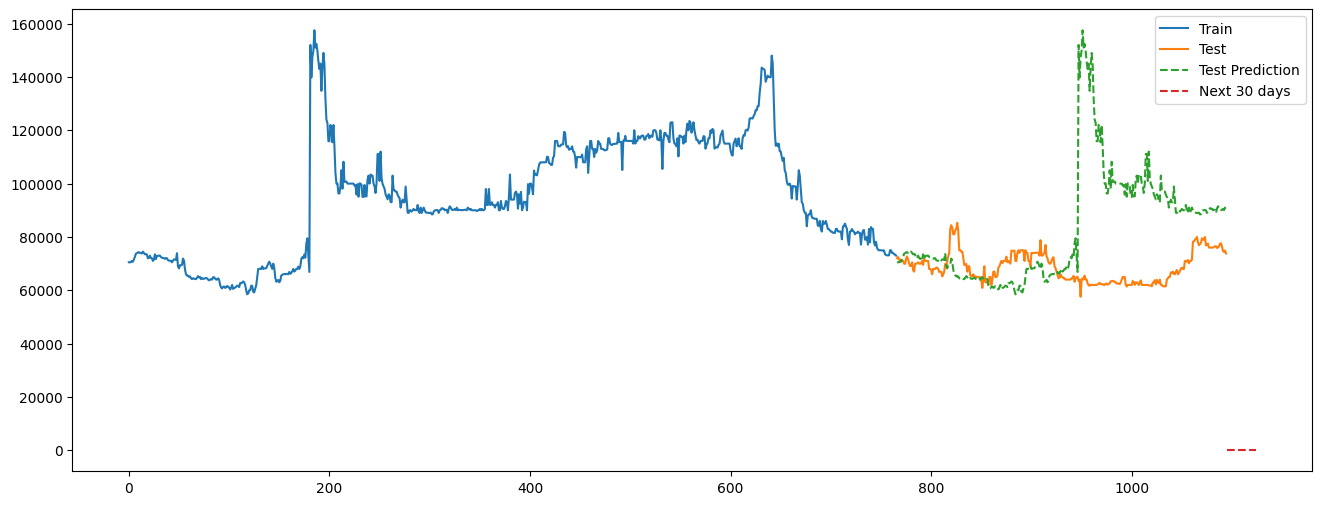

Tỷ lệ train/test: 8/2
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 21824.13, Test MAPE: 13.88%, Test MSLE: 0.05



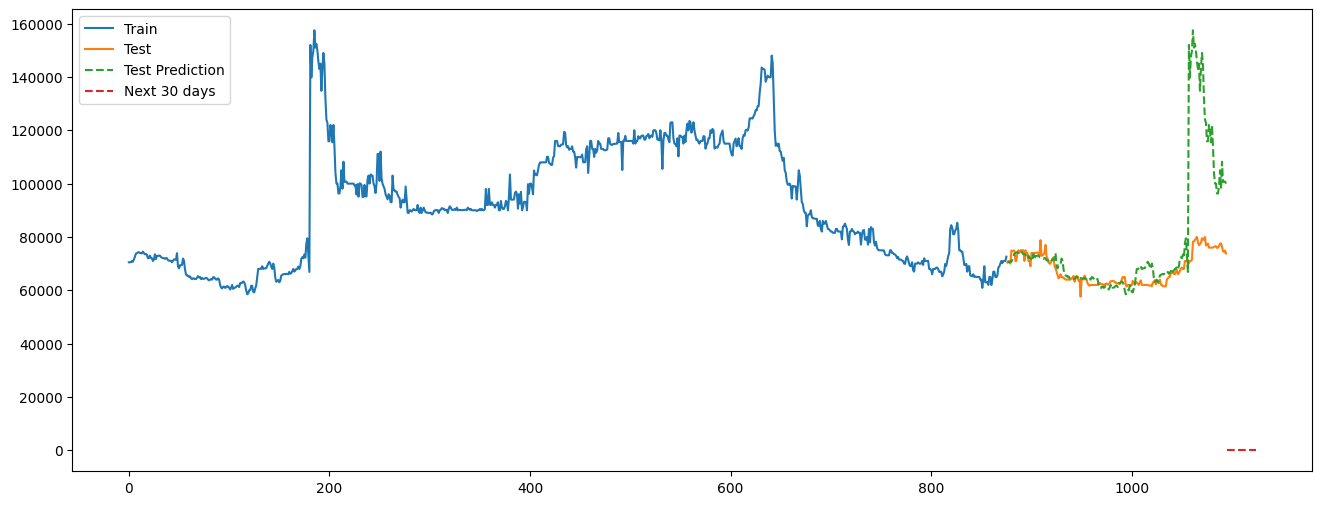

Tỷ lệ train/test: 9/1
Train RMSE: 0.00, Train MAPE: 0.00%, Train MSLE: 0.00
Test RMSE: 10698.11, Test MAPE: 14.28%, Test MSLE: 0.02



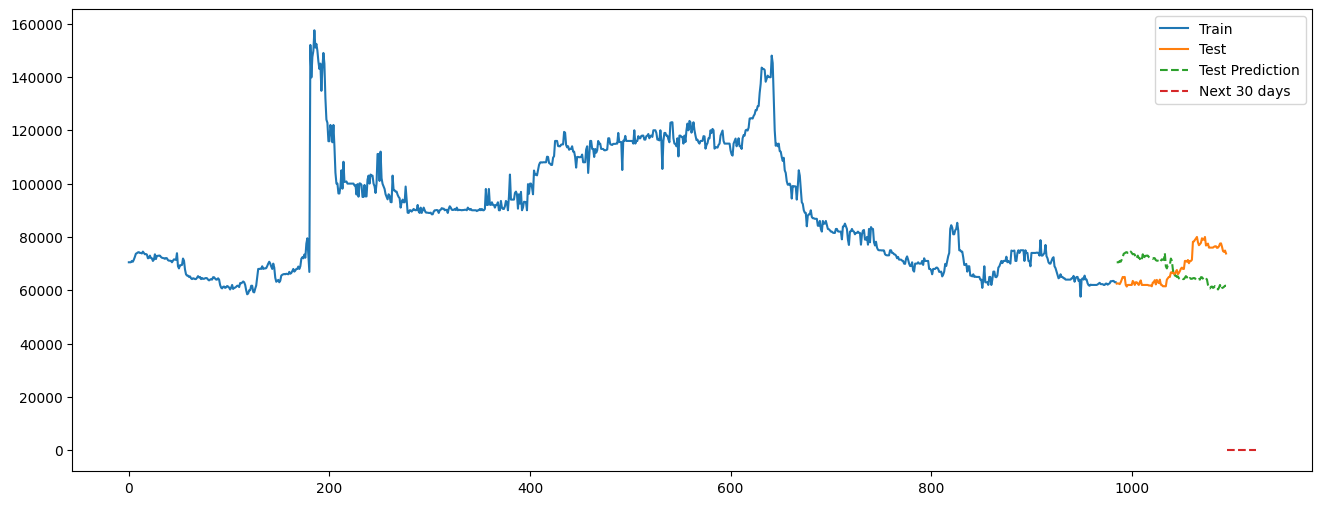

In [4]:
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('DP3.csv')
# Loại bỏ dấu phẩy khỏi chuỗi số và chuyển đổi thành số thực
prices = [float(price.replace(',', '')) for price in data['Price']]


# Hàm dự báo FFT
def fft_forecast(train, test, forecast_len):
    train_fft = fft(train)

    # Lọc bỏ các tần số cao
    train_fft[np.abs(train_fft) < 0.1] = 0

    # Tính toán dữ liệu dự báo bằng FFT ngược
    train_prediction = np.real(ifft(train_fft))

    # Dự báo cho dữ liệu test
    test_prediction = np.concatenate([train_prediction[-len(train):], np.zeros(len(test))])
    test_prediction = np.real(ifft(fft(test_prediction)))[:len(test)]

    # Dự báo cho các ngày tiếp theo
    future_prediction = np.concatenate([train_prediction, test_prediction, np.zeros(forecast_len)])
    future_prediction = np.real(ifft(fft(future_prediction)))[-forecast_len:]

    return train_prediction, test_prediction, future_prediction

# Hàm đánh giá mô hình
def evaluate_model(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = mean_absolute_percentage_error(true, pred) * 100
    msle = mean_squared_log_error(true, pred)
    return rmse, mape, msle

# Chia dữ liệu theo các tỷ lệ khác nhau
data_sizes = [(7, 3), (8, 2), (9, 1)]
for train_ratio, test_ratio in data_sizes:
    train_len = int(len(prices) * train_ratio / (train_ratio + test_ratio))
    test_len = len(prices) - train_len

    train_data = prices[:train_len]
    test_data = prices[train_len:]

    train_pred, test_pred, future_pred = fft_forecast(train_data, test_data, 30)

    # Đánh giá mô hình
    train_rmse, train_mape, train_msle = evaluate_model(train_data, train_pred)
    test_rmse, test_mape, test_msle = evaluate_model(test_data, test_pred)

    print(f"Tỷ lệ train/test: {train_ratio}/{test_ratio}")
    print(f"Train RMSE: {train_rmse:.2f}, Train MAPE: {train_mape:.2f}%, Train MSLE: {train_msle:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}, Test MAPE: {test_mape:.2f}%, Test MSLE: {test_msle:.2f}")
    print()

    # Vẽ đồ thị
    plt.figure(figsize=(16, 6))
    plt.plot(np.arange(len(train_data)), train_data, label='Train')
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(np.arange(len(train_data), len(train_data) + len(test_pred)), test_pred, '--', label='Test Prediction')
    plt.plot(np.arange(len(prices), len(prices) + 30), future_pred, '--', label='Next 30 days')
    plt.legend()
    plt.show()